# Home Advantage Analysis for the EPL and Saudi Pro League
This Colab is broken into 2 parts:
- 1: EPL home vs away analysis
- 2: Saudi home vs away analysis

## Let's calculate the home advantage for the EPL
- First import pandas and the data

In [ ]:
# import in the packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


In [ ]:
# download the data
# Download data from dropbox link
epl_home_games_link = 'https://www.dropbox.com/scl/fi/g89w8nhzln6ry9vx3698j/EPL-Home-Games.xlsx?rlkey=qvnyii9aonkm7uq24qs6dby1h&dl=0'
epl_away_games_link = 'https://www.dropbox.com/scl/fi/rwkc5680vy9vehxchgayr/EPL-Away-Games.xlsx?rlkey=a6zw5b7dv2qdc1us8vvripp9b&dl=0'
saudi_home_games_link = 'https://www.dropbox.com/scl/fi/qdfca15xnm2xorv8r16ty/Saudi-Home-Games.xlsx?rlkey=yyb3vd88anz4vhbnyoamnadxb&dl=0'
saudi_away_games_link = 'https://www.dropbox.com/scl/fi/cutm8rosdy5ehc57nu02t/Saudi-Away-Games.xlsx?rlkey=w9p6na3tiogp9h4seep118uau&dl=0'

# Specify the destination filename
epl_home_games_filename = 'EPL-Home-Games.xlsx'
epl_away_games_filename = 'EPL-Away-Games.xlsx'
saudi_home_games_filename = 'Saudi-Home-Games.xlsx'
saudi_away_games_filename = 'Saudi-Away-Games.xlsx'

# Download the file using wget
!wget -O {epl_home_games_filename} {epl_home_games_link}
!wget -O {epl_away_games_filename} {epl_away_games_link}
!wget -O {saudi_home_games_filename} {saudi_home_games_link}
!wget -O {saudi_away_games_filename} {saudi_away_games_link}

# read into a dataframe
epl_home_games_df = pd.read_excel(epl_home_games_filename)
epl_away_games_df = pd.read_excel(epl_away_games_filename)
saudi_home_games_df = pd.read_excel(saudi_home_games_filename)
saudi_away_games_df = pd.read_excel(saudi_away_games_filename)




--2025-08-03 15:24:45--  https://www.dropbox.com/scl/fi/g89w8nhzln6ry9vx3698j/EPL-Home-Games.xlsx?rlkey=qvnyii9aonkm7uq24qs6dby1h
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1dc503dcefa3909422e6660067.dl.dropboxusercontent.com/cd/0/inline/CuvxIGUv3emoux6jxOQ8o55vNExNRztczwk5Ck9IkQD7Yk8gsJmLRXpdKQao4TtFWyQB2CyGXaxSuR0qPjwTXb0FzZHAR6vu-90k0IviiQZqBToJL1EG9_RPLPUEDXBp5G4/file# [following]
--2025-08-03 15:24:46--  https://uc1dc503dcefa3909422e6660067.dl.dropboxusercontent.com/cd/0/inline/CuvxIGUv3emoux6jxOQ8o55vNExNRztczwk5Ck9IkQD7Yk8gsJmLRXpdKQao4TtFWyQB2CyGXaxSuR0qPjwTXb0FzZHAR6vu-90k0IviiQZqBToJL1EG9_RPLPUEDXBp5G4/file
Resolving uc1dc503dcefa3909422e6660067.dl.dropboxusercontent.com (uc1dc503dcefa3909422e6660067.dl.dropboxusercontent.com)... 162.125.1.15, 2620:100:6017:15::a27d:20f
Connecting to

# PART 1: EPL Analysis: Initial Counts and Probabilities

In [ ]:
# get the total number of games
total_epl_games = len(epl_home_games_df)
print(f"Total number of games in the EPL: {total_epl_games}")

total_home_wins = len(epl_home_games_df[epl_home_games_df['Games Won *'] == 1])
print(f"Total number of home wins in the EPL: {total_home_wins}")

total_away_wins = len(epl_away_games_df[epl_away_games_df['Games Won *'] == 1])
print(f"Total number of away wins in the EPL: {total_away_wins}")

total_draws = len(epl_home_games_df[epl_home_games_df['Games Drawn *'] == 1])
print(f"Total number of draws in the EPL: {total_draws}")



Total number of games in the EPL: 3420
Total number of home wins in the EPL: 1534
Total number of away wins in the EPL: 1107
Total number of draws in the EPL: 779


In [ ]:
# calculate the home advantage
home_points = (total_home_wins/total_epl_games) * 3 + (total_draws/total_epl_games)
print(f"Home points per game in the EPL: {home_points}")
away_points = (total_away_wins/total_epl_games) * 3 + (total_draws/total_epl_games)
print(f"Away points per game in the EPL: {away_points}")

home_advantage = home_points / (away_points + home_points)

print(f"Home advantage in the EPL: {home_advantage}")

Home points per game in the EPL: 1.5733918128654971
Away points per game in the EPL: 1.1988304093567252
Home advantage in the EPL: 0.567556164961502


## Let's look at the goals and shots difference - EPL

Mean goals per game in the EPL: 2.8444444444444446
Home Mean: 1.56, Median: 1.0, Mode: 1
Away Mean: 1.29, Median: 1.0, Mode: 1


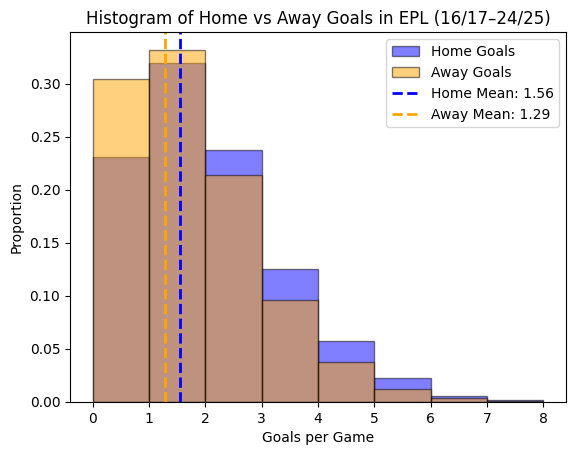

In [ ]:
# histogram analysis - home analysis
all_epl_df = pd.concat([epl_home_games_df, epl_away_games_df])
mean_goals = all_epl_df['Goals'].sum()/(len(all_epl_df)/2)
print(f"Mean goals per game in the EPL: {mean_goals}")


# Home stats
home_goals = epl_home_games_df['Goals']
mean_home_goals = home_goals.mean()
median_home_goals = home_goals.median()
mode_home_goals = home_goals.mode().iloc[0]

print(f"Home Mean: {mean_home_goals:.2f}, Median: {median_home_goals}, Mode: {mode_home_goals}")

# Away stats
away_goals = epl_away_games_df['Goals']
mean_away_goals = away_goals.mean()
median_away_goals = away_goals.median()
mode_away_goals = away_goals.mode().iloc[0]

print(f"Away Mean: {mean_away_goals:.2f}, Median: {median_away_goals}, Mode: {mode_away_goals}")

# Plot histograms
plt.hist(home_goals, bins=range(0, 9), density=True, alpha=0.5, label='Home Goals', color='blue', edgecolor='black')
plt.hist(away_goals, bins=range(0, 9), density=True, alpha=0.5, label='Away Goals', color='orange', edgecolor='black')

# Add vertical lines for home
plt.axvline(mean_home_goals, color='blue', linestyle='--', linewidth=2, label=f'Home Mean: {mean_home_goals:.2f}')


# Add vertical lines for away
plt.axvline(mean_away_goals, color='orange', linestyle='--', linewidth=2, label=f'Away Mean: {mean_away_goals:.2f}')


# Labels and legend
plt.title('Histogram of Home vs Away Goals in EPL (16/17–24/25)')
plt.xlabel('Goals per Game')
plt.ylabel('Proportion')
plt.legend(loc='upper right')
plt.show()



### Let's look at shots - EPL

Home - Mean: 13.89, Median: 13.0, Mode: 14, std dev: 5.774343957245201
Away - Mean: 11.53, Median: 11.0, Mode: 10, std dev: 5.10581215327131


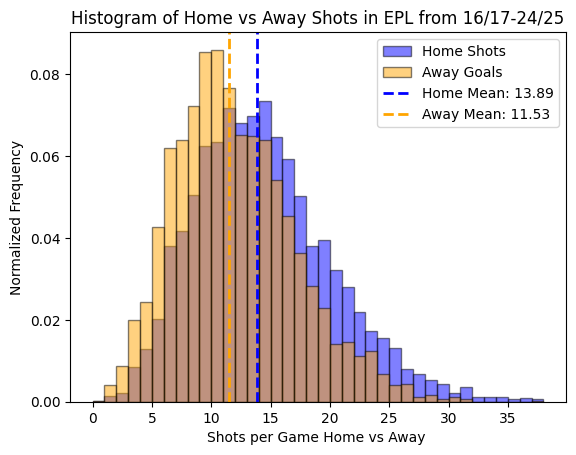

In [ ]:
# total shots histogram analysis
# Define a common bin range (e.g., from min to max shot count)
min_val = min(0, 0)
max_val = max( epl_home_games_df['Total Shots (inc. Blocks)'].max(), epl_away_games_df['Total Shots (inc. Blocks)'].max() )


# Set bin width and create bin edges
bin_width = 1
bins = list(range(int(min_val), int(max_val) + bin_width, bin_width))


plt.hist(epl_home_games_df['Total Shots (inc. Blocks)'], bins=bins, density=True, alpha=0.5, label='Home Shots', color='blue', edgecolor='black')
plt.hist(epl_away_games_df['Total Shots (inc. Blocks)'], bins=bins, density=True, alpha=0.5, label='Away Goals', color='orange', edgecolor='black')
plt.title('Histogram of Home vs Away Shots in EPL from 16/17-24/25')
plt.xlabel('Shots per Game Home vs Away ')
plt.ylabel('Normalized Frequency')

# Home stats
mean_home = epl_home_games_df['Total Shots (inc. Blocks)'].mean()
median_home = epl_home_games_df['Total Shots (inc. Blocks)'].median()
mode_home = epl_home_games_df['Total Shots (inc. Blocks)'].mode().iloc[0]
variance_home = epl_home_games_df['Total Shots (inc. Blocks)'].var()
std_dev_home = epl_home_games_df['Total Shots (inc. Blocks)'].std()

# Away stats
mean_away = epl_away_games_df['Total Shots (inc. Blocks)'].mean()
median_away = epl_away_games_df['Total Shots (inc. Blocks)'].median()
mode_away = epl_away_games_df['Total Shots (inc. Blocks)'].mode().iloc[0]
variance_away = epl_away_games_df['Total Shots (inc. Blocks)'].var()
std_dev_away = epl_away_games_df['Total Shots (inc. Blocks)'].std()

# Print for reference
print(f"Home - Mean: {mean_home:.2f}, Median: {median_home}, Mode: {mode_home}, std dev: {std_dev_home}")
print(f"Away - Mean: {mean_away:.2f}, Median: {median_away}, Mode: {mode_away}, std dev: {std_dev_away}")


# Vertical lines for home
plt.axvline(mean_home, color='blue', linestyle='--', linewidth=2, label=f'Home Mean: {mean_home:.2f}')


# Vertical lines for away
plt.axvline(mean_away, color='orange', linestyle='--', linewidth=2, label=f'Away Mean: {mean_away:.2f}')


plt.legend(loc='upper right')
plt.show()



### Is the difference signficant?
We will use the un-paired t-test to test the signifance (to use the paired t-test we need our data row-aligned which our data isn't necessarily). The unpaired t-test tests whether the means of two independent groups are statistically significantly different.

**T-statistic:**
A larger absolute t-statistic - greater difference between the two sample means, relative to the spread (variance) and sample size.

Its a measure of signal-to-noise: t = (difference in means)/(standard error of the difference)

**p-value:**
The p-value is the probability of seeing a difference as large (or larger) than the one observed, if the null hypothesis is true.




In [ ]:
# checking significance for both goals and shots (home vs away)
# goals
from scipy.stats import ttest_ind
home_goals = epl_home_games_df['Goals']
away_goals = epl_away_games_df['Goals']

t_stat, p_value = ttest_ind(home_goals, away_goals, equal_var=False)  # Welch’s t-test
print(f"Goals: T-statistic: {t_stat:.3f}")
print(f"Goals: P-value: {p_value:.8f}")


Goals: T-statistic: 8.834
Goals: P-value: 0.00000000


In [ ]:
# checking significance for both goals and shots (home vs away)
# shots
home_shots = epl_home_games_df['Total Shots (inc. Blocks)']
away_shots = epl_away_games_df['Total Shots (inc. Blocks)']

t_stat, p_value = ttest_ind(home_shots, away_shots, equal_var=False)  # Welch’s t-test
print(f"Shots: T-statistic: {t_stat:.3f}")
print(f"Shots: P-value: {p_value:.8f}")

Shots: T-statistic: 17.876
Shots: P-value: 0.00000000


In [ ]:
epl_home_games_df.columns

Index(['Rk', 'Team Name', 'Season', 'Date', 'Stadium', 'Opponents', 'Team ID',
       'Goals', 'Assists', 'Games Played', 'Yellow Cards', 'Red Cards',
       'Games Won *', 'Games Drawn *', 'Games Lost *', 'Home Wins *',
       'Away Wins *', 'Passes', 'Passes Successful', 'Corners',
       'Total Shots (inc. Blocks)', 'Total Shots (ex. Blocks)',
       'Shots on Target', 'Shots off Target', 'Blocked Shots'],
      dtype='object')

# Gaussian Representation

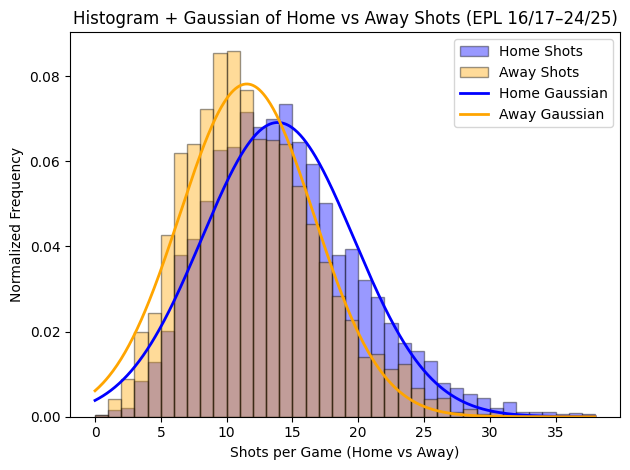

In [ ]:
from scipy.stats import norm

# plot the Gaussian of both home and away performances
# Create range of x values for smooth Gaussian curves
x_values = np.linspace(min_val, max_val, 500)

# Plot histogram again for comparison
plt.hist(epl_home_games_df['Total Shots (inc. Blocks)'], bins=bins, density=True, alpha=0.4, label='Home Shots', color='blue', edgecolor='black')
plt.hist(epl_away_games_df['Total Shots (inc. Blocks)'], bins=bins, density=True, alpha=0.4, label='Away Shots', color='orange', edgecolor='black')


# Plot Gaussian PDF for home
home_pdf = norm.pdf(x_values, mean_home, std_dev_home)
plt.plot(x_values, home_pdf, color='blue', linestyle='-', linewidth=2, label='Home Gaussian')

# Plot Gaussian PDF for away
away_pdf = norm.pdf(x_values, mean_away, std_dev_away)
plt.plot(x_values, away_pdf, color='orange', linestyle='-', linewidth=2, label='Away Gaussian')

# Final touches
plt.title('Histogram + Gaussian of Home vs Away Shots (EPL 16/17–24/25)')
plt.xlabel('Shots per Game (Home vs Away)')
plt.ylabel('Normalized Frequency')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()



## Poisson Representation

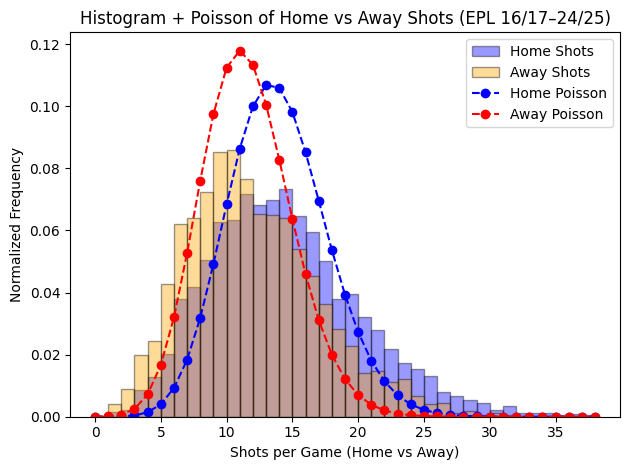

In [ ]:
# Poisson distribution
from scipy.stats import poisson

# Discrete values to evaluate Poisson PMFs
x = np.arange(min_val, max_val + 1)

# Poisson PMFs
poisson_home = poisson.pmf(x, mu=mean_home)
poisson_away = poisson.pmf(x, mu=mean_away)

# Plot histogram again for comparison
plt.hist(epl_home_games_df['Total Shots (inc. Blocks)'], bins=bins, density=True, alpha=0.4, label='Home Shots', color='blue', edgecolor='black')
plt.hist(epl_away_games_df['Total Shots (inc. Blocks)'], bins=bins, density=True, alpha=0.4, label='Away Shots', color='orange', edgecolor='black')

# Plot Poisson for home
plt.plot(x, poisson_home, 'bo--', label='Home Poisson')

# Plot Poisson for away
plt.plot(x, poisson_away, 'ro--', label='Away Poisson')

# Final touches
plt.title('Histogram + Poisson of Home vs Away Shots (EPL 16/17–24/25)')
plt.xlabel('Shots per Game (Home vs Away)')
plt.ylabel('Normalized Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# PART 2: Saudi Home vs Away Analysis


In [ ]:
# get the total number of games, and total number of home wins, draws and away wins
total_saudi_games = len(saudi_home_games_df)
print(f"Total number of games in the Saudi League: {total_saudi_games}")

total_home_wins_saudi = len(saudi_home_games_df[saudi_home_games_df['Games Won *'] == 1])
print(f"Total number of home wins in the Saudi League: {total_home_wins_saudi}")

total_away_wins_saudi = len(saudi_away_games_df[saudi_away_games_df['Games Won *'] == 1])
print(f"Total number of away wins in the Saudi League: {total_away_wins_saudi}")

total_draws_saudi = len(saudi_home_games_df[saudi_home_games_df['Games Drawn *'] == 1])
print(f"Total number of draws in the Saudi League: {total_draws_saudi}")

Total number of games in the Saudi League: 2162
Total number of home wins in the Saudi League: 949
Total number of away wins in the Saudi League: 711
Total number of draws in the Saudi League: 502


In [ ]:
# calculate the home advantage here



In [ ]:
# histogram analysis - home analysis vs away analysis



In [ ]:
# total shots histogram analysis




# do statistical testing

In [ ]:
# goals analysis and statistical testing


In [ ]:
# shot analysis - statistical testing
